<a href="https://colab.research.google.com/github/malik214-rgb/Analisis-Sentimen_Tentang-kasus-ijazah-Jokowi/blob/main/Kelompok_I_AMS_Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study-01:Analisis Sentimen dan Persepsi Publik terhadap Isu Ijazah Palsu Presiden Jokowi di Media Sosial

Kelompok I


| NIM | Nama |
| -------- | -------- |
|11220940000033   | Arjuananta Malik   |
|11220940000046   | Putri maesarah  |
|11210940000070   | Muhammad Aqlani Wafi |
|11210940000073   | Tonny Pramudya Bagus Santoso |

# Latar Belakang
Isu mengenai dugaan ijazah palsu Presiden Joko Widodo telah menjadi perbincangan hangat di media sosial, memunculkan berbagai reaksi dan opini dari masyarakat. Sebagai platform yang merepresentasikan opini publik secara real-time, media sosial seperti Twitter dan Instagram menjadi sarana utama penyebaran informasi maupun disinformasi terkait isu ini.

Namun, tingginya volume unggahan dan keberagaman opini membuat sulit untuk mengetahui secara objektif bagaimana persepsi publik secara keseluruhan terhadap isu ini. Selain itu, belum banyak studi yang secara sistematis menganalisis sentimen masyarakat berdasarkan data dari media sosial dalam konteks kasus ini.

In [1]:
#Import Modul yang diperlukan
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Kode Scrapping dengan twitterapi.io [[link]](https://github.com/aqlaniwafi10/UTS-Sosial-Media-Analisis/blob/master/main.ipynb)

# Data asli yang baru diberi label
Pada proses labeling disini kita mengidentifikasi setiap tweet apakah tweet itu positive, negative, atau netral terhadap topik video.
1.   positive = 0
2.   negative = 1
3.   Netral = 2

In [2]:
import pandas as pd

# Use the raw GitHub URL
url = 'https://raw.githubusercontent.com/malik214-rgb/Analisis-Sentimen_Tentang-kasus-ijazah-Jokowi/main/Labeling%20Data%20Twitter%20Ijazah%20Palsu.csv'

data = pd.read_csv(url)
data.head()

,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,conversationId,inReplyToUserId,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,1927387224108138985,NaN,NaN,"{'type': 'user', 'userName': 'sasaputri466403'...",{'media': [{'allow_download_status': {'allow_d...,NaN,{},{},NaN,NaN
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,1926832238928302559,30201110.0,alisyarief,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,1927376751954366674,NaN,NaN,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,1927214900792660265,185156524.0,hasyimmah,"{'type': 'user', 'userName': 'subairiubay93', ...",{},NaN,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,1927371964777144625,NaN,NaN,"{'type': 'user', 'userName': '__SudutPandang',...",{},NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN


# Preprocesing

## Data Cleaning

Di bawah ini terdapat beberapa fungsi untuk membersihkan teks dari elemen-elemen yang tidak diinginkan seperti URL, HTML, emoji, angka, dan simbol.

In [3]:
#Import modul yang diperlukan
import re
import string
import nltk


In [4]:
def remove_URL(text):  # Menghapus URL di text twitter
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_html(text):  # Menghapus tag HTML di text twitter
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):  # Menghapus emoji di text twitter
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_username(text):  # Menghapus username di text twitter
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', text)


def remove_symbols(text):  # Menghapus simbol di text twitter
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

data['clean_text'] = data['text'].apply(lambda x: remove_URL(x))
data['clean_text'] = data['clean_text'].apply(lambda x: remove_html(x))
data['clean_text'] = data['clean_text'].apply(lambda x: remove_emoji(x))
data['clean_text'] = data['clean_text'].apply(lambda x: remove_username(x))
data['clean_text'] = data['clean_text'].apply(lambda x: remove_symbols(x))
# data['clean_text'] = data['clean_text'].apply(lambda x: remove_numbers(x))

data.head(10)


,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,inReplyToUserId,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet,clean_text
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,NaN,NaN,"{'type': 'user', 'userName': 'sasaputri466403'...",{'media': [{'allow_download_status': {'allow_d...,NaN,{},{},NaN,NaN,Penuh Nilai C dan D di Transkip Nilai Terkuak ...
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,30201110.0,alisyarief,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di b...
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,NaN,NaN,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di bi...
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,185156524.0,hasyimmah,"{'type': 'user', 'userName': 'subairiubay93', ...",{},NaN,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN,Pak Hasyim sepertinya gerakan ini akibat dend...
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,NaN,NaN,"{'type': 'user', 'userName': '__SudutPandang',...",{},NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN,Sangat masuk akal ada dana besar untuk terus m...
5,tweet,1927369198222873008,https://x.com/mediaindonesia/status/1927369198...,https://twitter.com/mediaindonesia/status/1927...,BADAN Reserse Kriminal (Bareskrim) Polri menan...,2.0,Twitter for iPhone,0,0,0,...,NaN,NaN,"{'type': 'user', 'userName': 'mediaindonesia',...",{},{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'mediaindonesia.com/...,NaN,NaN,BADAN Reserse Kriminal Bareskrim Polri menangg...
6,tweet,1927352796883435684,https://x.com/248Mkm/status/1927352796883435684,https://twitter.com/248Mkm/status/192735279688...,Abis berita jd finalis pemimpin terkorup versi...,1.0,Twitter for iPhone,0,0,0,...,NaN,NaN,"{'type': 'user', 'userName': '248Mkm', 'url': ...",{},{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'universityworldnews...,NaN,NaN,Abis berita jd finalis pemimpin terkorup versi...
7,tweet,1927346214770471405,https://x.com/rahadev/status/1927346214770471405,https://twitter.com/rahadev/status/19273462147...,@ts_tonis @ferrykoto Lah waktu Jokowi jadi Wal...,1.0,Twitter for iPhone,0,0,0,...,377430426.0,ts_tonis,"{'type': 'user', 'userName': 'rahadev', 'url':...",{},NaN,{},"{'user_mentions': [{'id_str': '377430426', 'in...",NaN,NaN,Lah waktu Jokowi jadi Walikota Solo kan pres...
8,tweet,1927340460483219701,https://x.com/UmmiYusniar/status/1927340460483...,https://twitter.com/UmmiYusniar/status/1927340...,Polda Metro Jaya Usut Jejak Digital Roy Suryo ...,1.0,Twitter for iPhone,0,0,0,...,NaN,NaN,"{'type': 'user', 'userName': 'UmmiYusniar', 'u...",{},"{'binding_values': [{'key': 'player_url', 'val...",{},"{'urls': [{'display_url': 'search.a

## Case Folding

Case folding adalah proses dalam Natural Language Processing (NLP) atau Text Preprocessing yang bertujuan untuk mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Tujuan utamanya adalah menyamakan format teks agar mengurangi variasi dan lebih konsisten, terutama dalam analisis teks atau pengolahan data berbasis teks

In [5]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
# Visualisasi perbandingan dataset
data[ 'case_folding' ] = data[ 'clean_text' ].apply(case_folding)

data.head( 10 )

,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet,clean_text,case_folding
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,NaN,"{'type': 'user', 'userName': 'sasaputri466403'...",{'media': [{'allow_download_status': {'allow_d...,NaN,{},{},NaN,NaN,Penuh Nilai C dan D di Transkip Nilai Terkuak ...,penuh nilai c dan d di transkip nilai terkuak ...
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,alisyarief,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya\n\nmengapa di b...
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,NaN,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di bi...,gaduh ijazah palsu jokowi iya\n\nmengapa di bi...
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,hasyimmah,"{'type': 'user', 'userName': 'subairiubay93', ...",{},NaN,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN,Pak Hasyim sepertinya gerakan ini akibat dend...,pak hasyim sepertinya gerakan ini akibat dend...
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,NaN,"{'type': 'user', 'userName': '__SudutPandang',...",{},NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus m...
5,tweet,1927369198222873008,https://x.com/mediaindonesia/status/1927369198...,https://twitter.com/mediaindonesia/status/1927...,BADAN Reserse Kriminal (Bareskrim) Polri menan...,2.0,Twitter for iPhone,0,0,0,...,NaN,"{'type': 'user', 'userName': 'mediaindonesia',...",{},{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'mediaindonesia.com/...,NaN,NaN,BADAN Reserse Kriminal Bareskrim Polri menangg...,badan reserse kriminal bareskrim polri menangg...
6,tweet,1927352796883435684,https://x.com/248Mkm/status/1927352796883435684,https://twitter.com/248Mkm/status/192735279688...,Abis berita jd finalis pemimpin terkorup versi...,1.0,Twitter for iPhone,0,0,0,...,NaN,"{'type': 'user', 'userName': '248Mkm', 'url': ...",{},{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'universityworldnews...,NaN,NaN,Abis berita jd finalis pemimpin terkorup versi...,abis berita jd finalis pemimpin terkorup versi...
7,tweet,1927346214770471405,https://x.com/rahadev/status/1927346214770471405,https://twitter.com/rahadev/status/19273462147...,@ts_tonis @ferrykoto Lah waktu Jokowi jadi Wal...,1.0,Twitter for iPhone,0,0,0,...,ts_tonis,"{'type': 'user', 'userName': 'rahadev', 'url':...",{},NaN,{},"{'user_mentions': [{'id_str': '377430426', 'in...",NaN,NaN,Lah waktu Jokowi jadi Walikota Solo kan pres...,lah waktu jokowi jadi walikota solo kan pres...
8,tweet,1927340460483219701

## Mengatasi Singkatan dan kata yang kurang baku
Pada tahap ini kami melakukan secara manual pada link spreadsheet berikut, dengan pengecekan dua kali kami menggunakan kode untuk memperbaiki singkatan.
Berikut link spreadsheet yang digunakan dalam tahap ini :
[tabel slangs](https://docs.google.com/spreadsheets/d/1MIAvjIfdrxnFsUxN3r4NbAPwVckkFtQaYmwteVlYvHU/edit?usp=sharing)

In [6]:
import pandas as pd

# Use the raw GitHub URL for the cleaned data
url = 'https://raw.githubusercontent.com/malik214-rgb/Analisis-Sentimen_Tentang-kasus-ijazah-Jokowi/main/Singkatan.csv'
df = pd.read_csv(url)
df.head()

,id,tweet,clean_tweet,clean_tweet_singkatan
0,1927387224108138985,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",penuh nilai c dan d di transkip nilai kuak ipk...,penuh nilai c dan d di transkip nilai kuak ipk...
1,1927378493601436062,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,gaduh ijazah palsu jokowi iya mengapa di biar ...,gaduh ijazah palsu jokowi iya mengapa di biar ...
2,1927376751954366674,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya mengapa di biar ...,gaduh ijazah palsu jokowi iya mengapa di biar ...
3,1927374729498841414,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,pak hasyim seperti gera ini akibat dendam hti ...,pak hasyim seperti gera ini akibat dendam hati...
4,1927371964777144625,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus u...,sangat masuk akal ada dana besar untuk terus u...


pakai kode untuk cek ulang singkatan

In [7]:
# Kamus singkatan ke bentuk lengkap
singkatan = {
    "yg": "yang",
    "gak": "tidak",
    "ga": "tidak",
    "nga": "tidak",
    "nggak": "tidak",
    "udah": "sudah",
    "udh": "sudah",
    "uda": "sudah",
    "sm": "sama",
    "aja": "saja",
    "tp": "tapi",
    "klo": "kalau",
    "kl": "kalau",
    "kmn": "ke mana",
    "bgt": "banget",
    "bnyk": "banyak",
    "dgn": "dengan",
    "dr": "dari",
    "sdh": "sudah",
    "jd": "jadi",
    "pd": "pada",
    "utk": "untuk",
    "krn": "karena",
    "trs": "terus",
    "tmn": "teman",
    "bs": "bisa",
    "tdk": "tidak",
    "td": "tadi",
    "lg": "lagi",
    "dl": "dulu",
    "sbg": "sebagai",
    "pak": "Bapak",
    "bu": "Ibu",
    "bgmn": "bagaimana",
    "shg":"sehingga",
    "dlm":"dalam",
    "goblok" : "bodoh",
    "tolol": "bodoh",
    "hrs": "harus",
    "jkw" :"jokowi",
    "tsb": "tersebut",
    "thn" :"tahun",
    "eks" : "mantan"
    }

# Ganti singkatan di kolom 'clean_tweet_singkatan'
df['clean_tweet_singkatan'] = df['clean_tweet_singkatan'].replace(singkatan)

df


,id,tweet,clean_tweet,clean_tweet_singkatan
0,1927387224108138985,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",penuh nilai c dan d di transkip nilai kuak ipk...,penuh nilai c dan d di transkip nilai kuak ipk...
1,1927378493601436062,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,gaduh ijazah palsu jokowi iya mengapa di biar ...,gaduh ijazah palsu jokowi iya mengapa di biar ...
2,1927376751954366674,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya mengapa di biar ...,gaduh ijazah palsu jokowi iya mengapa di biar ...
3,1927374729498841414,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,pak hasyim seperti gera ini akibat dendam hti ...,pak hasyim seperti gera ini akibat dendam hati...
4,1927371964777144625,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus u...,sangat masuk akal ada dana besar untuk terus u...
...,...,...,...,...
5774,1924963403615109391,Walaupun @jokowi kian menyebalkan bagi banyak ...,walaupun kian sebal bagi banyak orang tapi dal...,walaupun kian sebal bagi banyak orang tapi dal...
5775,1924958160756080954,@cobeh2022 Jokowi dan kaki tangannya memelihar...,jokowi dan kaki tangan pelihara kisruh isu ija...,jokowi dan kaki tangan pelihara kisruh isu ija...
5776,1924957839212323108,"@PngAdilnR4kyt Ada info dari medsos, Jokowi bi...",ada info dari medsos jokowi bilang kalo prabow...,ada info dari medsos jokowi bilang kalau prabo...
5777,1924956599548043306,"Dgn kronologi kasus yg melekat pada diri nya, ...",dgn kronologi kasus yg lekat pada diri nya buk...,dengan kronologi kasus yang lekat pada diri ny...


gabung data yang sudah diperbaiki slangs, ke data utama

In [8]:
df1 = pd.concat([data, df['clean_tweet_singkatan']], axis=1)
df1

,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet,clean_text,case_folding,clean_tweet_singkatan
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,"{'type': 'user', 'userName': 'sasaputri466403'...",{'media': [{'allow_download_status': {'allow_d...,NaN,{},{},NaN,NaN,Penuh Nilai C dan D di Transkip Nilai Terkuak ...,penuh nilai c dan d di transkip nilai terkuak ...,penuh nilai c dan d di transkip nilai kuak ipk...
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya\n\nmengapa di b...,gaduh ijazah palsu jokowi iya mengapa di biar ...
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,"{'type': 'user', 'userName': 'yusuf_my1', 'url...",{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di bi...,gaduh ijazah palsu jokowi iya\n\nmengapa di bi...,gaduh ijazah palsu jokowi iya mengapa di biar ...
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,"{'type': 'user', 'userName': 'subairiubay93', ...",{},NaN,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN,Pak Hasyim sepertinya gerakan ini akibat dend...,pak hasyim sepertinya gerakan ini akibat dend...,pak hasyim seperti gera ini akibat dendam hati...
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,"{'type': 'user', 'userName': '__SudutPandang',...",{},NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,tweet,1924963403615109391,https://x.com/Sentjoko/status/1924963403615109391,https://twitter.com/Sentjoko/status/1924963403...,Walaupun @jokowi kian menyebalkan bagi banyak ...,2.0,Twitter for iPhone,0,1,2,...,"{'type': 'user', 'userName': 'Sentjoko', 'url'...",{},NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...",NaN,NaN,Walaupun kian menyebalkan bagi banyak orang t...,walaupun kian menyebalkan bagi banyak orang t...,walaupun kian sebal bagi banyak orang tapi dal...
5775,tweet,1924958160756080954,https://x.com/SHAFIRA_2004/status/192495816075...,https://twitter.com/SHAFIRA_2004/status/192495...,@cobeh2022 Jokowi dan kaki tangannya memelihar...,1.0,Twitter for iPhone,0,0,1,...,"{'type': 'user', 'userName': 'SHAFIRA_2004', '...",{},NaN,{},{'user_mentions': [{'id_str': '160363855382068...,NaN,NaN,Jokowi dan kaki tangannya memelihara kekisruh...,jokowi dan kaki tangannya memelihara kekisruh...,jokowi dan kaki tangan pelihara kisruh isu ija...
5776,tweet,1924957839212323108,https://x.com/PardiW3500/status/19249578392123...,https://twitter.com/PardiW3500/status/19249578...,"@PngAdilnR4kyt Ad

## Tokenisasi

Tokenization adalah proses membagi teks menjadi unit-unit yang lebih kecil yang disebut token. Token ini bisa berupa kata, frasa, karakter, atau elemen lain.  Tujuan dari tokenisasi adalah untuk memudahkan pemrosesan dan analisis teks dengan memecahnya menjadi bagian-bagian yang lebih terstruktur dan mudah diolah.

In [9]:
def tokenize(text):  # Fungsi tokenisasi teks
    if isinstance(text, str):  # Periksa apakah teks adalah string
        tokens = text.split()
        return tokens
    else:
        return []  # Kembalikan list kosong jika bukan string

# Visualisasi Perbandingan dataset
df1['tokenize'] = df1['clean_tweet_singkatan'].apply(tokenize)

df1.head(10)

,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet,clean_text,case_folding,clean_tweet_singkatan,tokenize
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,{'media': [{'allow_download_status': {'allow_d...,NaN,{},{},NaN,NaN,Penuh Nilai C dan D di Transkip Nilai Terkuak ...,penuh nilai c dan d di transkip nilai terkuak ...,penuh nilai c dan d di transkip nilai kuak ipk...,"[penuh, nilai, c, dan, d, di, transkip, nilai,..."
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya\n\nmengapa di b...,gaduh ijazah palsu jokowi iya mengapa di biar ...,"[gaduh, ijazah, palsu, jokowi, iya, mengapa, d..."
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,{'media': [{'additional_media_info': {'monetiz...,NaN,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di bi...,gaduh ijazah palsu jokowi iya\n\nmengapa di bi...,gaduh ijazah palsu jokowi iya mengapa di biar ...,"[gaduh, ijazah, palsu, jokowi, iya, mengapa, d..."
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,{},NaN,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN,Pak Hasyim sepertinya gerakan ini akibat dend...,pak hasyim sepertinya gerakan ini akibat dend...,pak hasyim seperti gera ini akibat dendam hati...,"[pak, hasyim, seperti, gera, ini, akibat, dend..."
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,{},NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus u...,"[sangat, masuk, akal, ada, dana, besar, untuk,..."
5,tweet,1927369198222873008,https://x.com/mediaindonesia/status/1927369198...,https://twitter.com/mediaindonesia/status/1927...,BADAN Reserse Kriminal (Bareskrim) Polri menan...,2.0,Twitter for iPhone,0,0,0,...,{},{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'mediaindonesia.com/...,NaN,NaN,BADAN Reserse Kriminal Bareskrim Polri menangg...,badan reserse kriminal bareskrim polri menangg...,badan reserse kriminal bareskrim polri tanggap...,"[badan, reserse, kriminal, bareskrim, polri, t..."
6,tweet,1927352796883435684,https://x.com/248Mkm/status/1927352796883435684,https://twitter.com/248Mkm/status/192735279688...,Abis berita jd finalis pemimpin terkorup versi...,1.0,Twitter for iPhone,0,0,0,...,{},{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'universityworldnews...,NaN,NaN,Abis berita jd finalis pemimpin terkorup versi...,abis berita jd finalis pemimpin terkorup versi...,abis berita jadi final pimpin korup versi occr...,"[abis, berita, jadi, final, pimpin, korup, ver..."
7,tweet,1927346214770471405,https://x.com/rahadev/status/1927346214770471405,https://twitter.com/rahadev/status/19273462147...,@ts_tonis @ferrykoto L

## stop word

Stopword removal adalah proses menghapus kata-kata umum yang sering muncul dalam teks tetapi biasanya tidak memberikan kontribusi signifikan terhadap makna atau analisis teks. kata-kata umum yang sering muncul biasanya adalah kata hubung seperti : "di", "ke", "dari", "adalah", "yang", "setelah", "dan", "itu" dan lain sebagainya.

In [10]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url = 'https://raw.githubusercontent.com/malik214-rgb/Analisis-Sentimen_Tentang-kasus-ijazah-Jokowi/main/daftar%20stopwords%20Ijazah%20Jokowi.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url)

    # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Visualisasi perbandingan dataset
df1['stopword_removal'] = df1['tokenize'].apply(remove_stopwords)
df1.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,card,place,entities,quoted_tweet,retweeted_tweet,clean_text,case_folding,clean_tweet_singkatan,tokenize,stopword_removal
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,NaN,{},{},NaN,NaN,Penuh Nilai C dan D di Transkip Nilai Terkuak ...,penuh nilai c dan d di transkip nilai terkuak ...,penuh nilai c dan d di transkip nilai kuak ipk...,"[penuh, nilai, c, dan, d, di, transkip, nilai,...","[penuh, nilai, c, transkip, nilai, kuak, ipk, ..."
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,NaN,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya\n\nmengapa di b...,gaduh ijazah palsu jokowi iya mengapa di biar ...,"[gaduh, ijazah, palsu, jokowi, iya, mengapa, d...","[gaduh, terhormat, presiden, henti, gaduh, tug..."
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,NaN,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di bi...,gaduh ijazah palsu jokowi iya\n\nmengapa di bi...,gaduh ijazah palsu jokowi iya mengapa di biar ...,"[gaduh, ijazah, palsu, jokowi, iya, mengapa, d...","[gaduh, terhormat, presiden, henti, gaduh, tug..."
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,NaN,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN,Pak Hasyim sepertinya gerakan ini akibat dend...,pak hasyim sepertinya gerakan ini akibat dend...,pak hasyim seperti gera ini akibat dendam hati...,"[pak, hasyim, seperti, gera, ini, akibat, dend...","[hasyim, gera, akibat, dendam, hati, fpi, berf..."
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,NaN,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus u...,"[sangat, masuk, akal, ada, dana, besar, untuk,...","[akal, dana, ulur, isu, akal, betapa, keras, s..."
5,tweet,1927369198222873008,https://x.com/mediaindonesia/status/1927369198...,https://twitter.com/mediaindonesia/status/1927...,BADAN Reserse Kriminal (Bareskrim) Polri menan...,2.0,Twitter for iPhone,0,0,0,...,{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'mediaindonesia.com/...,NaN,NaN,BADAN Reserse Kriminal Bareskrim Polri menangg...,badan reserse kriminal bareskrim polri menangg...,badan reserse kriminal bareskrim polri tanggap...,"[badan, reserse, kriminal, bareskrim, polri, t...","[badan, reserse, kriminal, bareskrim, polri, t..."
6,tweet,1927352796883435684,https://x.com/248Mkm/status/1927352796883435684,https://twitter.com/248Mkm/status/192735279688...,Abis berita jd finalis pemimpin terkorup versi...,1.0,Twitter for iPhone,0,0,0,...,{'binding_values': [{'key': 'photo_image_full_...,{},{'urls': [{'display_url': 'universityworldnews...,NaN,NaN,Abis berita jd finalis pemimpin terkorup versi...,abis berita jd finalis pemimpin terkorup versi...,abis berita jadi final pimpin korup versi occr...,"[abis, berita, jadi, final, pimpin, korup, ver..."

## Stemming

Merupakan proses mengubah kata-kata dalam teks menjadi bentuk dasarnya (root form). Tujuan dari stemming adalah untuk mengurangi variasi kata yang berasal dari perubahan bentuk kata yang berbeda (misalnya, perubahan bentuk kata kerja atau kata benda) sehingga kata-kata dengan makna yang sama dapat dianggap sebagai entitas yang sama. Misalnya, kata-kata  "memindahkan","perpindahan", "berpindah",  dan "pindah-pindah" semuanya dapat direduksi menjadi bentuk dasar "pindah".

In [11]:
# Install dan Import modul yang diperlukan
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.4 MB/s eta 0:00:00


In [12]:
factory = StemmerFactory()           # Membuat instance dari StemmerFactory
stemmer = factory.create_stemmer()   # Membuat instance stemmer menggunakan factory

def stem_text(text): # Mendefinisikan fungsi stem_text untuk melakukan stemming pada teks input
    return [stemmer.stem(word) for word in text]

In [13]:
# Visualisasi perbandingan dataset
df1['stemming'] = df1['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df1.head(10)

,type,id,url,twitterUrl,text,"Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)",source,retweetCount,replyCount,likeCount,...,place,entities,quoted_tweet,retweeted_tweet,clean_text,case_folding,clean_tweet_singkatan,tokenize,stopword_removal,stemming
0,tweet,1927387224108138985,https://x.com/sasaputri466403/status/192738722...,https://twitter.com/sasaputri466403/status/192...,"Penuh Nilai C dan D di Transkip Nilai, Terkuak...",1.0,Twitter for iPhone,0,0,0,...,{},{},NaN,NaN,Penuh Nilai C dan D di Transkip Nilai Terkuak ...,penuh nilai c dan d di transkip nilai terkuak ...,penuh nilai c dan d di transkip nilai kuak ipk...,"[penuh, nilai, c, dan, d, di, transkip, nilai,...","[penuh, nilai, c, transkip, nilai, kuak, ipk, ...",penuh nilai c transkip nilai kuak ipk ugm 2 10...
1,tweet,1927378493601436062,https://x.com/yusuf_my1/status/192737849360143...,https://twitter.com/yusuf_my1/status/192737849...,@alisyarief Gaduh ijazah palsu jokowi? Iya\n\n...,1.0,Twitter for iPhone,1,1,1,...,{},"{'user_mentions': [{'id_str': '30201110', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di b...,gaduh ijazah palsu jokowi iya\n\nmengapa di b...,gaduh ijazah palsu jokowi iya mengapa di biar ...,"[gaduh, ijazah, palsu, jokowi, iya, mengapa, d...","[gaduh, terhormat, presiden, henti, gaduh, tug...",gaduh hormat presiden henti gaduh tugas usut s...
2,tweet,1927376751954366674,https://x.com/yusuf_my1/status/192737675195436...,https://twitter.com/yusuf_my1/status/192737675...,Gaduh ijazah palsu jokowi? Iya\n\nMengapa di b...,1.0,Twitter for iPhone,1,0,2,...,{},"{'user_mentions': [{'id_str': '40580714', 'ind...",NaN,NaN,Gaduh ijazah palsu jokowi Iya\n\nMengapa di bi...,gaduh ijazah palsu jokowi iya\n\nmengapa di bi...,gaduh ijazah palsu jokowi iya mengapa di biar ...,"[gaduh, ijazah, palsu, jokowi, iya, mengapa, d...","[gaduh, terhormat, presiden, henti, gaduh, tug...",gaduh hormat presiden henti gaduh tugas usut s...
3,tweet,1927374729498841414,https://x.com/subairiubay93/status/19273747294...,https://twitter.com/subairiubay93/status/19273...,@hasyimmah Pak Hasyim sepertinya gerakan ini a...,1.0,Twitter for iPhone,0,0,0,...,{},"{'user_mentions': [{'id_str': '185156524', 'in...",NaN,NaN,Pak Hasyim sepertinya gerakan ini akibat dend...,pak hasyim sepertinya gerakan ini akibat dend...,pak hasyim seperti gera ini akibat dendam hati...,"[pak, hasyim, seperti, gera, ini, akibat, dend...","[hasyim, gera, akibat, dendam, hati, fpi, berf...",hasyim gera akibat dendam hati fpi berfikir pi...
4,tweet,1927371964777144625,https://x.com/__SudutPandang/status/1927371964...,https://twitter.com/__SudutPandang/status/1927...,Sangat masuk akal ada dana besar untuk terus m...,1.0,Twitter for iPhone,1,0,2,...,{},"{'user_mentions': [{'id_str': '366987179', 'in...","{'type': 'tweet', 'id': '1926906227902079330',...",NaN,Sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus m...,sangat masuk akal ada dana besar untuk terus u...,"[sangat, masuk, akal, ada, dana, besar, untuk,...","[akal, dana, ulur, isu, akal, betapa, keras, s...",akal dana ulur isu akal betapa keras saing kon...
5,tweet,1927369198222873008,https://x.com/mediaindonesia/status/1927369198...,https://twitter.com/mediaindonesia/status/1927...,BADAN Reserse Kriminal (Bareskrim) Polri menan...,2.0,Twitter for iPhone,0,0,0,...,{},{'urls': [{'display_url': 'mediaindonesia.com/...,NaN,NaN,BADAN Reserse Kriminal Bareskrim Polri menangg...,badan reserse kriminal bareskrim polri menangg...,badan reserse kriminal bareskrim polri tanggap...,"[badan, reserse, kriminal, bareskrim, polri, t...","[badan, reserse, kriminal, bareskrim, polri, t...",badan reserse kriminal bareskrim polri tanggap...
6,tweet,1927352796883435684,https://x.com/248Mkm/status/1927352796883435684,https://twitter.com/248Mkm/status/192735279688...,Abis berita jd finalis pemimpin terkorup versi...,1.0,Twitter for iPhone,0,0,0,...,{},{'urls': [{'display_url': 'universityworldnews...,NaN,NaN,Abis berita jd fi

# Data Visualisation

In [14]:
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
nltk.download('punkt')
from nltk.util import ngrams


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Sentiment Analysis

<ipython-input-15-323896b11041>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['positif', 'negatif', 'netral'], y=[pro_count, kontra_count, netral_count], palette='pastel')


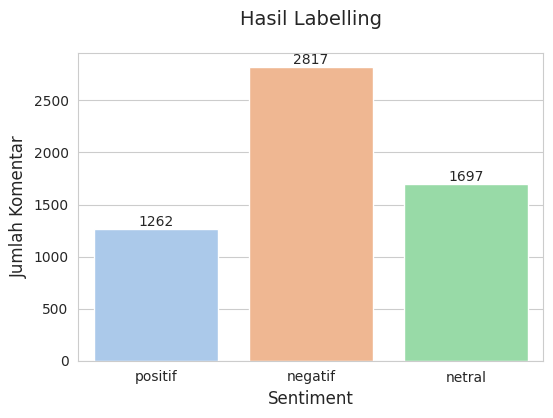

In [15]:
import seaborn as sns
# Membuat DataFrame baru untuk data sentiment pro (nilai 1)
positive_df1 = df1[df1['Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)'] == 0]

# Membuat DataFrame baru untuk data sentiment kontra (nilai 2)
negative_df1 = df1[df1['Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)'] == 1]

# Membuat DataFrame baru untuk data sentiment netral (nilai 3)
netral_df1 = df1[df1['Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)'] == 2 ]

# Hitung jumlah data sentiment pro dan kontra
pro_count = positive_df1.shape[0]
kontra_count = negative_df1.shape[0]
netral_count = netral_df1.shape[0]

# Plot barplot untuk melihat jumlah data sentiment pro dan kontra
sns.set_style('whitegrid')

# Visualisasi Persebaran Sentimen
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['positif', 'negatif', 'netral'], y=[pro_count, kontra_count, netral_count], palette='pastel')
plt.title('Hasil Labelling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)

for i, count in enumerate([pro_count, kontra_count, netral_count]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

Tanggapan masyarakat Indonesia tentang isu ijazah mantan presiden jokowi didominasi oleh pertanyaan atau pernyataan kasar dan sarkasme tentang topik terkait, sehingga sentimen negatif lebih banyak dibandingkan dengan sentimen lainnya.

## WordCloud



### Positive

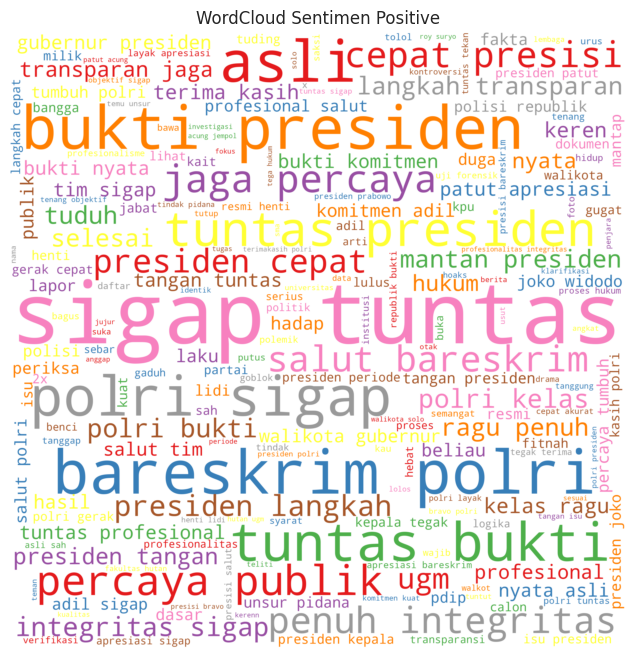

In [16]:
# Gabungkan Teks dalam Kolom stemming
positive_df1_text = ' '.join(positive_df1['stemming'].dropna().astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(positive_df1_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positive')
plt.margins(x=0, y=0)
plt.show()

- Kata-Kata Dominan:
"sigap", "tuntas", "bukti", "asli", "presiden", "polri", "bareskrim", "profesional", "percaya", "transparan"
1. Kata-kata ini menunjukkan narasi positif terhadap penanganan kasus oleh pihak kepolisian, terutama terhadap isu ijazah Presiden Jokowi.

  - Respons Cepat dan Tegas dari Aparat
Kata-kata seperti “sigap”, “tuntas”, dan “cepat” menggambarkan kepuasan publik terhadap respons aparat penegak hukum, terutama Polri dan Bareskrim.

  - Publik memberikan apresiasi terhadap langkah cepat dan tindakan yang dianggap profesional.

2. Validasi dan Pembelaan terhadap Presiden
Munculnya kata “asli”, “bukti”, “percaya”, dan “presiden” menunjukkan bahwa:

  - Banyak tweet positif yang menegaskan keyakinan bahwa ijazah Presiden Jokowi adalah asli.

  - Ada semacam dukungan atau pembelaan terhadap kredibilitas Presiden.

3. Citra Baik untuk Institusi
Kata seperti “bareskrim”, “polri”, dan “profesional” menunjukkan bahwa:

  - Polri mendapat kepercayaan publik dalam menangani kasus ini.

  - Istilah “transparan” dan “integritas” menandakan harapan dan pujian terhadap prinsip keterbukaan.

4. Nada Apresiatif dan Optimis
Frasa seperti “terima kasih”, “salut”, “banggakan”, dan “patut apresiasi” mendominasi narasi.
  - Sentimen positif cenderung mengapresiasi kerja dan hasil, bukan sekadar membela atau menyerang pihak tertent



### Negative

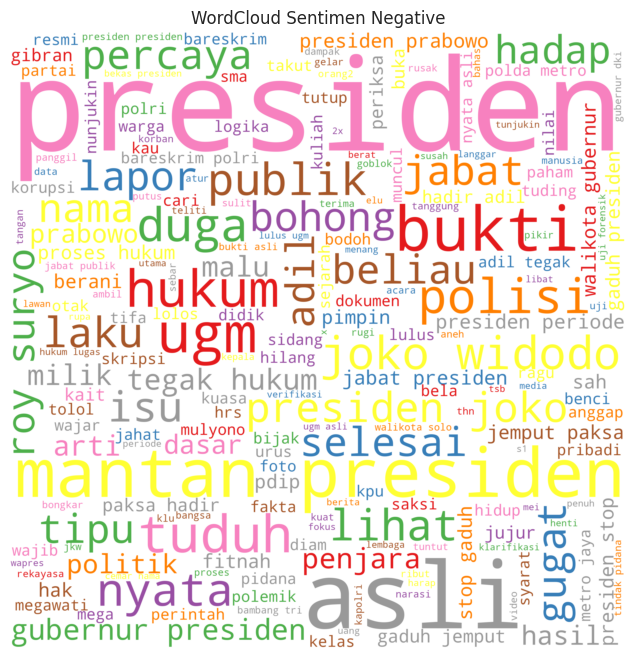

In [17]:
# Gabungkan Teks dalam Kolom stemming
negative_df1_text = ' '.join(negative_df1['stemming'].dropna().astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(negative_df1_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negative')
plt.margins(x=0, y=0)
plt.show()

Interpretasi WordCloud Sentimen Negative
1. Fokus Utama pada Figur Presiden

  - Kata “presiden”, “mantan presiden”, “jokowi”, dan “widodo” muncul dominan, menunjukkan bahwa figur Presiden Jokowi menjadi titik utama perhatian kritik dalam percakapan.

  - Kemunculan “beliau” juga menunjukkan bahwa diskursus kadang menggunakan nada formal atau sarkastik saat menyebut presiden.

2. Isu Legitimasi Ijazah dan Keaslian Dokumen

  - Kata-kata seperti “asli”, “bukti”, “tipu”, “tuduh”, “duga”, “bohong”, dan “ijazah” memperlihatkan bahwa percakapan negatif banyak menekankan pada keabsahan dokumen dan adanya dugaan pemalsuan.

  - Kata “ugm” muncul, mengindikasikan bahwa Universitas Gadjah Mada menjadi bagian dari perdebatan dan mungkin dipertanyakan kredibilitasnya oleh beberapa netizen.

3. Seruan Hukum dan Keadilan

  - Muncul kata-kata seperti “hukum”, “sidang”, “adil”, “gugat”, “penjara”, “polisi”, “periksa”, dan “proses hukum”, yang menunjukkan bahwa pihak negatif mendorong tindakan hukum atau mempertanyakan proses hukum yang sedang/harus berlangsung.

  - Istilah “publik” dan “politik” menandakan bahwa isu ini dianggap memiliki dimensi hukum sekaligus politis.

4. Narasi Emosional dan Provokatif

  - Kata seperti “malu”, “bohong”, “fitnah”, “tipu”, dan “gaduh” menggambarkan emosi publik—dari kekecewaan hingga kemarahan.

  - Kata “roy suryo” juga muncul, yang bisa menandakan bahwa tokoh tersebut menjadi aktor kunci atau sering disebut dalam narasi negatif.

### Netral

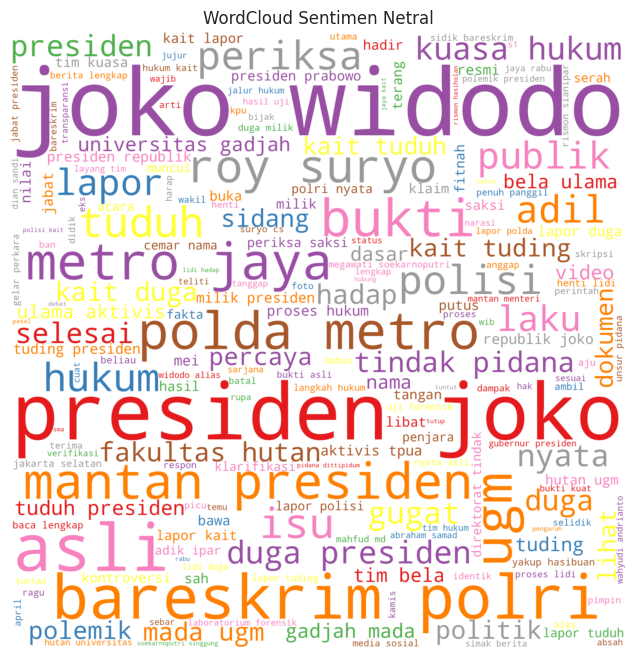

In [18]:
# Gabungkan Teks dalam Kolom stemming
netral_df1_text = ' '.join(netral_df1['stemming'].dropna().astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(netral_df1_text)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Netral')
plt.margins(x=0, y=0)
plt.show()

Interpretasi WordCloud Sentimen Netral
1. Dominasi Figur dan Lembaga Resmi

  -- Kata-kata “joko widodo”, “presiden”, “mantan presiden”, dan “presiden joko” menandakan bahwa netizen menyebut langsung nama dan jabatan Jokowi tanpa nada emosional (tidak memihak atau menyerang).

  - Munculnya lembaga seperti “bareskrim”, “polri”, “polda metro jaya”, dan “metro” mengindikasikan bahwa dalam sentimen netral, pembicaraan berfokus pada prosedur dan proses hukum resmi.

2. Objektivitas dan Fokus Fakta

  - Kata-kata seperti “asli”, “bukti”, “lapor”, “duga”, “tuduh”, dan “periksa” mendominasi, menunjukkan bahwa publik sedang membicarakan klaim dan klarifikasi tanpa menyimpulkan sendiri atau menuduh.

  - Kata “adil”, “hukum”, dan “publik” juga menunjukkan perhatian pada aspek hukum dan transparansi, bukan serangan pribadi.

3. Peran Institusi Pendidikan

  - “UGM”, “universitas gadjah mada”, dan “fakultas” muncul sebagai bagian dari narasi, tetapi dengan konteks netral, menandakan penyebutan institusi dalam kapasitas klarifikasi atau objek pengujian ijazah.

4. Figur Publik Terkait

  - Nama “roy suryo” masih muncul, menunjukkan keterlibatannya dianggap penting dalam pembahasan, tetapi tidak selalu dibahas secara emosional atau penuh prasangka.

5. Bahasa Netral dan Legal

  - Banyak kata berkonotasi formal seperti “resmi”, “dokumen”, “klarifikasi”, “laboratorium”, “uji”, “identik”, yang mengindikasikan bahwa wacana netral berusaha menggunakan pendekatan logis, administratif, atau ilmiah.



## Grafik Sentimen terhadap isReply

<Axes: xlabel='isReply', ylabel='count'>

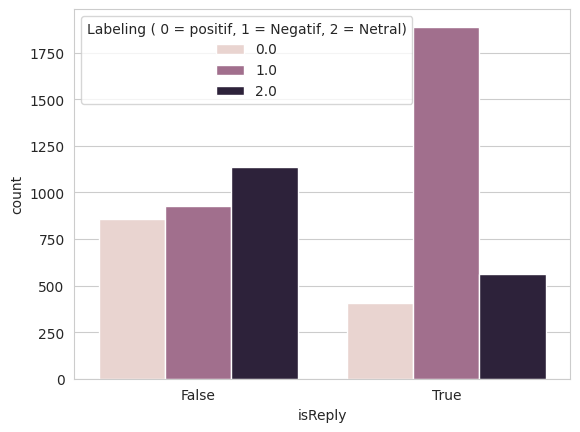

In [19]:
sns.countplot(x='isReply', hue='Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)', data=df1)

 1. Sentimen Negatif Mendominasi Tweet Balasan (isReply=True)
Terlihat jelas bahwa jumlah tweet negatif yang merupakan balasan sangat tinggi, mendekati 1900 tweet.
Ini menunjukkan bahwa diskusi atau perdebatan negatif terjadi secara aktif dalam bentuk balasan, bukan di tweet utama.

2. Tweet Utama Lebih Banyak yang Netral
Untuk tweet isReply=False (bukan balasan), sentimen netral paling dominan, diikuti oleh negatif dan positif.
Ini mengindikasikan bahwa tweet original cenderung menyampaikan informasi secara netral, dan reaksi negatif baru muncul di balasan.

3. Tweet Positif Tidak Terlalu Banyak (di kedua sisi)
Baik pada tweet balasan maupun original, jumlah tweet positif tergolong paling sedikit.
Ini bisa menunjukkan bahwa opini publik terhadap isu ijazah palsu Presiden Jokowi cenderung netral atau negatif, jarang yang membela secara eksplisit.

## Tren jumlah tweet perhari

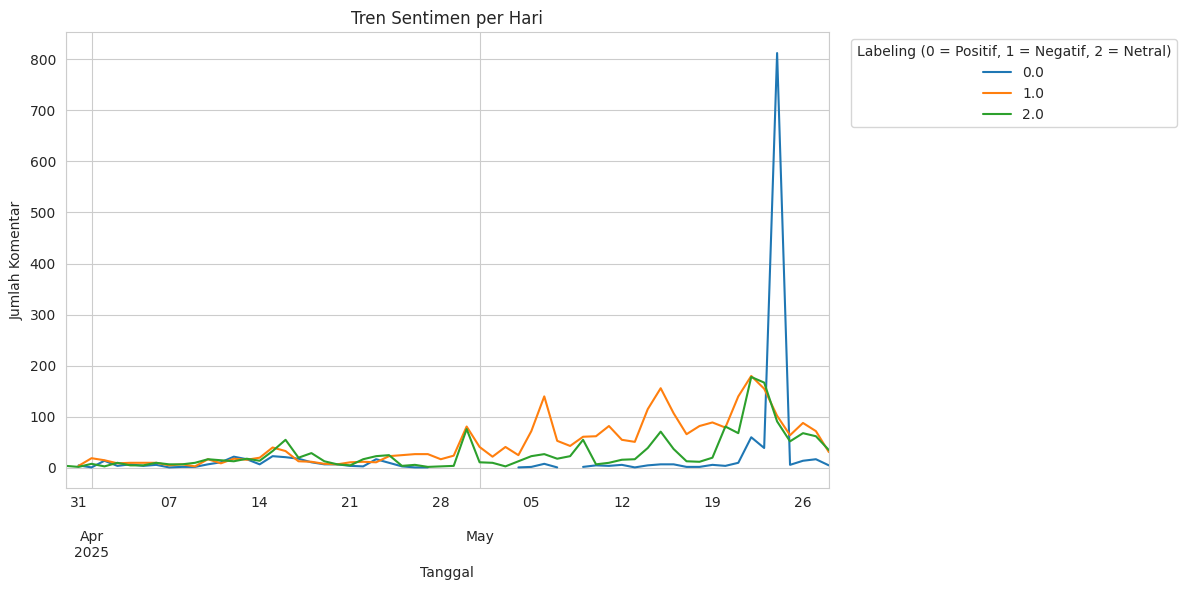

In [24]:
import matplotlib.pyplot as plt

# Pastikan kolom tanggal dalam format datetime
df1['createdAt'] = pd.to_datetime(df1['createdAt'])

# Kelompokkan data per hari dan label sentimen
sentiment_time = df1.groupby([
    pd.Grouper(key='createdAt', freq='D'),
    'Labeling ( 0 = positif, 1 = Negatif, 2 = Netral)'
]).size().unstack()

# Buat plot
plt.figure(figsize=(12, 6))  # Lebarkan grafik
sentiment_time.plot(ax=plt.gca())

plt.title('Tren Sentimen per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Komentar')

# Letakkan legenda di luar grafik
plt.legend(
    title='Labeling (0 = Positif, 1 = Negatif, 2 = Netral)',
    bbox_to_anchor=(1.02, 1), loc='upper left'
)

plt.tight_layout()
plt.show()


1. Lonjakan Tajam Sentimen Positif Sekitar 22 Mei 2025
  - Ada puncak drastis pada sentimen positif (~1000 tweet) dalam satu hari.

  - Hal ini kemungkinan dipicu oleh peristiwa besar, yaitu Bareskrim Polri memutuskan menghentikan penyelidikan laporan terkait dugaan kepemilikan ijazah palsu Joko Widodo yang dilayangkan Tim Pembela Ulama dan Aktivis (TPUA) karena tidak menemukan tindak pidana sekaligus memastikan bahwa ijazah SMA dan S1 milik Joko Widodo asli setelah dilakukan pemeriksaan dokumen dan saksi-saksi terkait. (sumber:tempo)


2. Sentimen Negatif Cenderung Konsisten dan Lebih Dominan
    - Selama sebagian besar waktu (awal Mei hingga sebelum lonjakan), sentimen negatif terlihat stabil dan cukup tinggi dibanding yang lain.

  - Ini menunjukkan bahwa opini negatif terhadap isu tersebut berkembang secara konsisten, meskipun tidak meledak drastis.

3. Sentimen Netral Relatif Seimbang dan Meningkat Jelang Akhir Mei
  - Ada sedikit peningkatan sentimen netral menuju akhir Mei, kemungkinan karena media atau akun besar mulai mengambil posisi netral/informatif.

  - Bisa jadi publik mulai menahan opini atau hanya menyebarkan berita tanpa sikap emosional.

## Tweet dengan likeCount terbanyak

In [21]:
import ast

# 1. Pastikan kolom author jadi dictionary, kalau masih str
df1['author'] = df1['author'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 2. Urutkan berdasarkan like dan ambil 20 teratas
top20_like = df1.sort_values(by='likeCount', ascending=False).head(20)

# 3. Tampilkan hasil
top20_like[['author', 'text', 'likeCount']]


,author,text,likeCount
5414,"{'type': 'user', 'userName': 'denismalhotra', ...",Jujur tidak tertarik mengikuti kasus dugaan ij...,39070
4549,"{'type': 'user', 'userName': 'ilhampid', 'url'...",Masa masa berat UGM\n\n1. Kasus ijazah jokowi\...,17527
1803,"{'type': 'user', 'userName': 'Naz_lira', 'url'...","Jika Terbukti IJAZAH PALSU, Jokowi Terancam Pe...",9267
2202,"{'type': 'user', 'userName': 'kompascom', 'url...",Tim Kuasa Hukum Presiden ke-7 Republik Indones...,6550
4046,"{'type': 'user', 'userName': 'tempodotco', 'ur...",Dian Sandi Utama mengunggah foto yang dia klai...,5153
2531,"{'type': 'user', 'userName': 'tvOneNews', 'url...",Setelah Bareskrim Polri nyatakan ijazah Presid...,5003
3639,"{'type': 'user', 'userName': 'AnKiiim_', 'url'...",Refly Harun soal Roy Suryo diperiksa Polisi ka...,4940
578,"{'type': 'user', 'userName': 'AnKiiim_', 'url'...",Refly Harun soal Roy Suryo diperiksa Polisi ka...,4940
3486,"{'type': 'user', 'userName': 'Chynthia_K', 'ur...",.\nJANGAN BERHENTI. TETAPLAH BERISIK SUARAKAN ...,4468
5449,"{'type': 'user', 'userName': 'ilhampid', 'url'...",Kasus gamma “ padahal barang bukti nya rekayas...,4413


1. Tweet Terpopuler Justru Bernada Acuh atau Sinis
Tweet paling banyak di-retweet (6783) berasal dari akun denismalhotra dengan narasi:

"Jujur tidak tertarik mengikuti kasus dugaan ijazah palsu Jokowi ini tapi melihat video ini justru yang tersirat adalah ijazahnya memang palsu"

  - Menunjukkan sikap skeptis, mungkin sinis atau jenuh terhadap isu ini, namun justru menjadi viral.

  - Bisa jadi bentuk kejenuhan publik terhadap perdebatan politis.

2. UGM dan Aspek Akademik Jadi Fokus Utama
Tweet dari akun ilhampid (4988 retweet):

"Masa masa berat UGM 1 Kasus ijazah jokowi 2 Mosi tidak percaya rektor 3 Dosen cabul 4 Kematian argo JUSTICEFORARGO FH UGM 24 Sampe kapan lock kasus jan cuma pernyataan omon omon tapi butuh aksi nyata pembelaan Innalillahi turut berduka cita atas rasa keadilan"

  - Menandakan UGM ikut terseret opini publik dalam kasus ini.
  - Potensi kerusakan reputasi lembaga akademik menjadi perhatian.

3. Ancaman Hukum dan Spekulasi Hukum Jadi Daya Tarik
Tweet dari Naz_lira (2768 retweet):

"Jika Terbukti IJAZAH PALSU Jokowi Terancam Pengembalian Fasilitas Negara dan Pembatalan Hak Fasilitas dan Tunjangan Pensiun Presiden Enak..."

  - Publik tertarik dengan konsekuensi hukum dari kasus ini, bukan sekadar isu moral atau politik.



# Kesimpulan dan Insight

## Kesimpulan
Isu ijazah Presiden Jokowi di media sosial memicu respons luas dengan dominasi sentimen negatif, terutama di kolom balasan tweet yang menunjukkan kritik terhadap topik, pengunggah, maupun institusi terkait seperti UGM. Sentimen negatif sangat kuat secara emosional dan politis, menyoroti keaslian ijazah, tuntutan hukum, serta polarisasi opini. Namun, terdapat pula sentimen netral yang berfokus pada aspek pembuktian dan prosedur hukum secara faktual, menandakan ruang diskusi rasional di tengah isu sensitif ini. Menjelang akhir Mei 2025, terjadi lonjakan sentimen positif yang diduga akibat intervensi naratif seperti klarifikasi resmi atau dukungan tokoh publik. Word cloud sentimen positif mencerminkan respons yang mengapresiasi penanganan tegas, transparan, dan profesional oleh institusi seperti Polri dan Bareskrim, serta munculnya kembali dukungan terhadap Presiden melalui kata-kata seperti “asli,” “bukti,” dan “percaya.”


## Insight
 1. Kunci untuk Strategi Komunikasi & Pemahaman Publik

  Narasi Negatif Mudah Menyebar di Ruang Balasan. Balasan tweet menjadi ruang ekspresi emosi negatif yang tinggi—bisa digunakan untuk mengukur persepsi masyarakat yang sebenarnya.

2. Intervensi Naratif Sangat Efektif

  Lonjakan sentimen positif menunjukkan bahwa klarifikasi atau komunikasi strategis dari otoritas bisa mengubah arah opini publik secara signifikan, meski sentimen negatif sudah lebih dulu dominan.

3. Viralitas Tidak Selalu Berarti Dukungan atau Penolakan

  Beberapa tweet paling viral menunjukkan ambiguitas—bisa berupa sindiran, kritik lembaga, atau opini netral yang menarik perhatian luas karena kontroversinya.

4. Institusi yang Tanggap Mampu Memulihkan Kepercayaan

  Polri dan Bareskrim dipersepsikan positif karena dianggap sigap, profesional, dan transparan, yang memberikan efek pemulihan kepercayaan publik terhadap isu yang bersifat sensitif.

5. Presiden Tetap Mendapat Dukungan dari Kelompok Tertentu

  Meski awalnya isu ini mengguncang kredibilitas, munculnya kata-kata seperti “percaya”, “asli”, dan “bukti” mengindikasikan dukungan kuat dari kelompok masyarakat tertentu terhadap Presiden.

## **NOTES**
Pada 22 Mei 2025, saat Bareskrim Polri secara resmi menyatakan keaslian ijazah Presiden Jokowi dan menghentikan penyelidikan karena tidak ditemukan unsur pidana [[antarnews]](https://www.antaranews.com/berita/4851265/bareskrim-polri-nyatakan-ijazah-universitas-jokowi-asli?), terjadi lonjakan besar dalam sentimen negatif di media sosial. Reaksi ini menunjukkan bahwa alih-alih meredakan kontroversi, pengumuman tersebut justru memperburuk persepsi negatif di kalangan pengguna media sosial. Banyak warganet merespons dengan keraguan, sindiran, atau tudingan manipulasi, menandakan bahwa klarifikasi resmi tidak diterima secara luas dan malah memperkuat skeptisisme terhadap proses penegakan hukum maupun kredibilitas lembaga negara.